In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 14})
plt.rcParams.update({"axes.labelsize": 12})

In [3]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML = 0.0
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2
y0 = [ -60, -60]
w0 = [0.0, 0.0]
y02 = [ -20, -20]

#time constants
dt = 0.01
t_final = 1400


I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC= np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I_hopf[i,0] = 90
    I_hopf[i,1] = 90
    I_SNLC[i,0] = 50
    I_SNLC[i,1] = 50
    #I_homoclinic[i,0] = 45
    I_homoclinic[i,0] = 40.
    I_homoclinic[i,1] = 40.


In [4]:
data_hopf, complete_hopf, matrix_hopf = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML,tau)
data_SNLC, complete_SNLC, matrix_SNLC = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_SNLC,I_SNLC,Is,k_ML,tau)
data_homoclinic, complete_homoclinic, matrix_homoclinic = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML,tau)

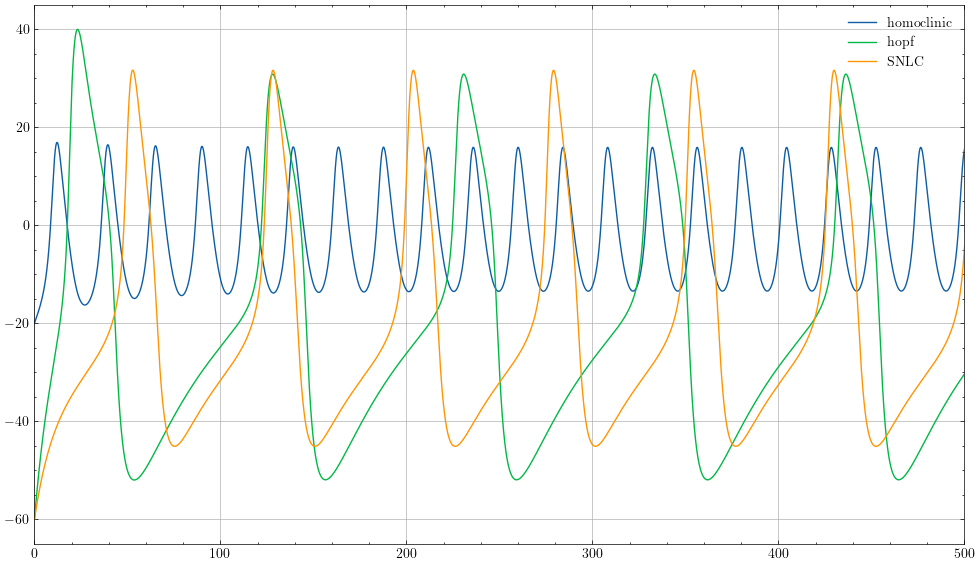

In [5]:
time = np.linspace(0,t_final,int(t_final/dt),)

plt.xlim(0,500)
plt.plot(time,data_homoclinic[:,0],label = 'homoclinic')
plt.plot(time,data_hopf[:,0], label = 'hopf')
plt.plot(time,data_SNLC[:,0], label = 'SNLC')
plt.legend()

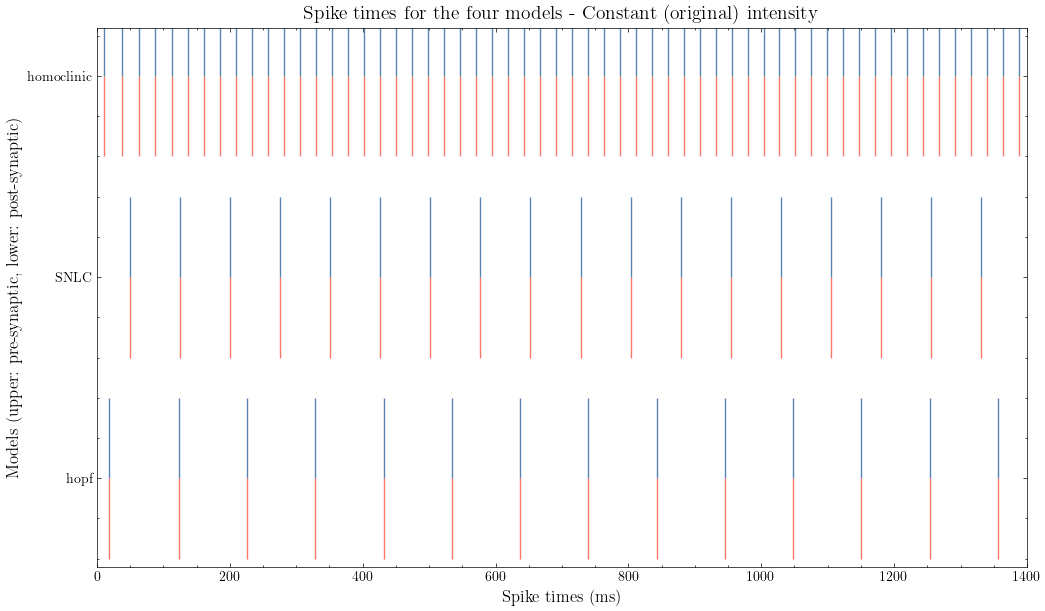

In [6]:
spike_hopf_1 =  (np.argwhere(np.array(matrix_hopf.todense())[0,:]>0) * dt).flatten()
spike_hopf_2 =  (np.argwhere(np.array(matrix_hopf.todense())[1,:]>0) * dt).flatten()
spike_SNLC_1 =  (np.argwhere(np.array(matrix_SNLC.todense())[0,:]>0) * dt).flatten()
spike_SNLC_2 =  (np.argwhere(np.array(matrix_SNLC.todense())[1,:]>0) * dt).flatten()
spike_homoclinic_1 =  (np.argwhere(np.array(matrix_homoclinic.todense())[0,:]>0) * dt).flatten()
spike_homoclinic_2 =  (np.argwhere(np.array(matrix_homoclinic.todense())[1,:]>0) * dt).flatten()


fig, ax = plt.subplots()

ax.eventplot(spike_hopf_1, color = '#5B84B1FF')
ax.eventplot(spike_hopf_2,color='#FC766AFF',lineoffsets=0,label='hola')
ax.eventplot(spike_SNLC_2,color = '#FC766AFF',lineoffsets=2.5)
ax.eventplot(spike_SNLC_1, color = '#5B84B1FF', lineoffsets= 3.5)
ax.eventplot(spike_homoclinic_2,color = '#FC766AFF',lineoffsets= 5.0 )
ax.eventplot(spike_homoclinic_1, color = '#5B84B1FF', lineoffsets= 6.0)
ax.grid()
ax.set_ylim(-0.6,6.1)
ax.set_ylabel('Models (upper: pre-synaptic, lower: post-synaptic)')
plt.yticks((0.5,3.0,5.5))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'hopf'
labels[1] = 'SNLC'
labels[2] = 'homoclinic'

ax.set_yticklabels(labels, color = 'black')
ax.set_xlabel('Spike times (ms)')
ax.set_xlim(0,1400)

plt.title('Spike times for the four models - Constant (original) intensity')
plt.show()



In [7]:
firing_hopf_pre = len(spike_hopf_1)  * 1000 / t_final 
firing_hopf_post = len(spike_hopf_2)   *1000 / t_final
firing_SNLC_pre = len(spike_SNLC_1)  * 1000 / t_final 
firing_SNLC_post = len(spike_SNLC_2)  *1000 / t_final
firing_homoclinic_pre = len(spike_homoclinic_1)  * 1000 / t_final 
firing_homoclinic_post = len(spike_homoclinic_2)  *1000 / t_final
print('Pre-synaptic firing rates \n hopf:',firing_hopf_pre,'SNLC:',firing_SNLC_pre, 'homoclinic:', firing_homoclinic_pre )
print('Post-synaptic firing rates \n hopf:',firing_hopf_post,'SNLC:',firing_SNLC_post, 'homoclinic:', firing_homoclinic_post)


Pre-synaptic firing rates 
 hopf: 10.0 SNLC: 12.857142857142858 homoclinic: 41.42857142857143
Post-synaptic firing rates 
 hopf: 10.0 SNLC: 12.857142857142858 homoclinic: 41.42857142857143


In [8]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML_1 = 0.3
k_ML_2 = 0.2
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2
y0 = [ -60, -60]
y02 = [ -20, -20]
w0 = [0.0, 0.0]

#time constants
dt = 0.01
t_final = 1400

#the noise will be common for all cases
x1 = np.random.normal(0,5,int(t_final/dt))
x2 = np.random.normal(0,5,int(t_final/dt))
x3 = np.random.normal(0,8,int(t_final/dt))
x4 = np.random.normal(0,8,int(t_final/dt))

I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC= np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))

I_hopf[:,0] = 90 * (1+ 1*x1)
I_hopf[:,1] = 90 * (1+ 1*x2)
I_SNLC[:,0] = 50 * (1+ 1*x1)
I_SNLC[:,1] = 50 * (1+ 1*x2)
I_homoclinic[:,0] = 40 * (1+ 1*x3)
I_homoclinic[:,1] = 40 * (1+ 1*x4)


In [9]:
data_hopf, complete_hopf, matrix_hopf = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML_2,tau)
data_SNLC, complete_SNLC, matrix_SNLC = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_SNLC,I_SNLC,Is,k_ML_1,tau)
data_homoclinic, complete_homoclinic, matrix_homoclinic = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML_1,tau)

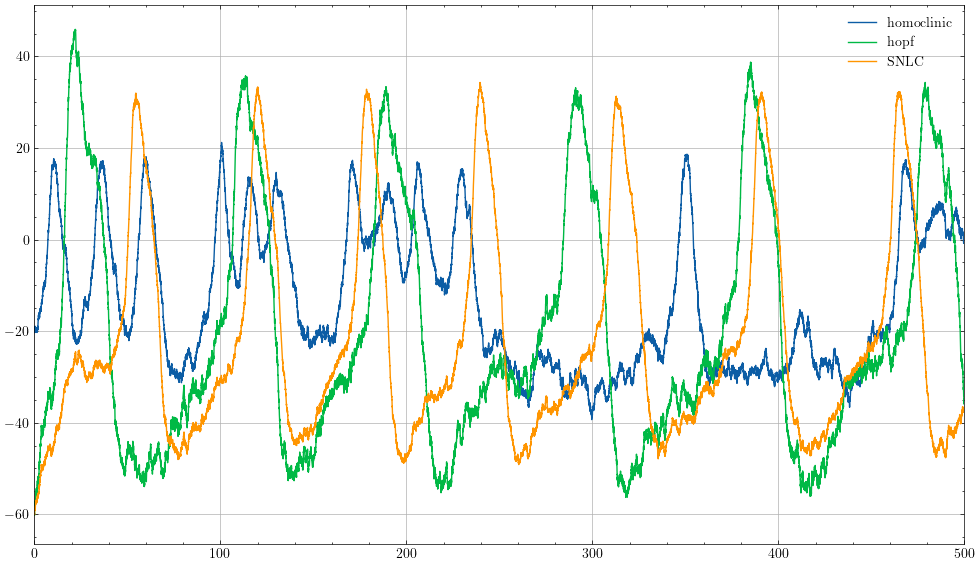

In [10]:
time = np.linspace(0,t_final,int(t_final/dt),)

plt.xlim(0,500)
plt.plot(time,data_homoclinic[:,0],label = 'homoclinic')
plt.plot(time,data_hopf[:,0], label = 'hopf')
plt.plot(time,data_SNLC[:,0], label = 'SNLC')
plt.legend()

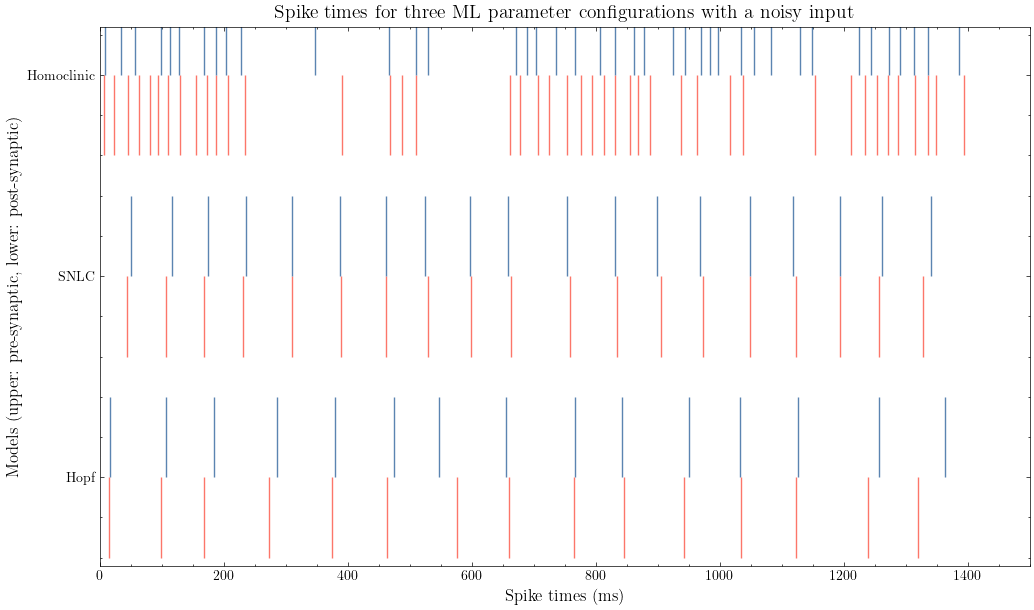

In [11]:
spike_hopf_1 =  (np.argwhere(np.array(matrix_hopf.todense())[0,:]>0) * dt).flatten()
spike_hopf_2 =  (np.argwhere(np.array(matrix_hopf.todense())[1,:]>0) * dt).flatten()
spike_SNLC_1 =  (np.argwhere(np.array(matrix_SNLC.todense())[0,:]>0) * dt).flatten()
spike_SNLC_2 =  (np.argwhere(np.array(matrix_SNLC.todense())[1,:]>0) * dt).flatten()
spike_homoclinic_1 =  (np.argwhere(np.array(matrix_homoclinic.todense())[0,:]>0) * dt).flatten()
spike_homoclinic_2 =  (np.argwhere(np.array(matrix_homoclinic.todense())[1,:]>0) * dt).flatten()


fig, ax = plt.subplots()

ax.eventplot(spike_hopf_1, color = '#5B84B1FF')
ax.eventplot(spike_hopf_2,color='#FC766AFF',lineoffsets=0,label='hola')
ax.eventplot(spike_SNLC_2,color = '#FC766AFF',lineoffsets=2.5)
ax.eventplot(spike_SNLC_1, color = '#5B84B1FF', lineoffsets= 3.5)
ax.eventplot(spike_homoclinic_2,color = '#FC766AFF',lineoffsets= 5.0 )
ax.eventplot(spike_homoclinic_1, color = '#5B84B1FF', lineoffsets= 6.0)
ax.grid()
ax.set_ylim(-0.6,6.1)
ax.set_ylabel('Models (upper: pre-synaptic, lower: post-synaptic)')
plt.yticks((0.5,3.0,5.5))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'Hopf'
labels[1] = 'SNLC'
labels[2] = 'Homoclinic'

ax.set_yticklabels(labels, color = 'black')
ax.set_xlabel('Spike times (ms)')
ax.set_xlim(0,1500)

plt.title('Spike times for three ML parameter configurations with a noisy input')
plt.show()



In [12]:
firing_hopf_pre = len(spike_hopf_1)  * 1000 / t_final 
firing_hopf_post = len(spike_hopf_2)   *1000 / t_final
firing_SNLC_pre = len(spike_SNLC_1)  * 1000 / t_final 
firing_SNLC_post = len(spike_SNLC_2)  *1000 / t_final
firing_homoclinic_pre = len(spike_homoclinic_1)  * 1000 / t_final 
firing_homoclinic_post = len(spike_homoclinic_2)  *1000 / t_final
print('Pre-synaptic firing rates \n hopf:',firing_hopf_pre,'SNLC:',firing_SNLC_pre, 'homoclinic:', firing_homoclinic_pre )
print('Post-synaptic firing rates \n hopf:',firing_hopf_post,'SNLC:',firing_SNLC_post, 'homoclinic:', firing_homoclinic_post)


Pre-synaptic firing rates 
 hopf: 10.714285714285714 SNLC: 13.571428571428571 homoclinic: 28.571428571428573
Post-synaptic firing rates 
 hopf: 10.714285714285714 SNLC: 13.571428571428571 homoclinic: 30.714285714285715


In [13]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML_1 = 0.3
k_ML_2 = 0.2
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations


np.random.seed(1234)
n_measurements = 15

chi_hopf = np.zeros(n_measurements)
chi_SNLC = np.zeros(n_measurements)
chi_homoclinic= np.zeros(n_measurements)

rossum_hopf = np.zeros((n_measurements,2))
rossum_SNLC = np.zeros((n_measurements,2))
rossum_homoclinic = np.zeros((n_measurements,2))

rel_hopf = np.zeros(n_measurements)
rel_SNLC = np.zeros(n_measurements)
rel_homoclinic = np.zeros(n_measurements)

I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC = np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))

firing_rate_hopf = np.zeros((n_measurements,2))
firing_rate_SNLC = np.zeros((n_measurements,2))
firing_rate_homoclinic = np.zeros((n_measurements,2))


t = np.linspace(0,t_final,int(t_final/dt))
t_R = 0.5
t_Re = 0.5


saved_data_hopf_on = {}
saved_data_SNLC_on = {}
saved_data_homoclinic_on = {}

In [14]:
manager = mp.Manager()
return_dict = manager.dict()


for i in range(0,n_measurements):
    jobs = []
    #the noise will be common for all cases
    x1 = np.random.normal(0,5,int(t_final/dt))
    x2 = np.random.normal(0,5,int(t_final/dt))
    x3 = np.random.normal(0,8,int(t_final/dt))
    x4 = np.random.normal(0,8,int(t_final/dt))

    I_hopf = np.zeros((int(t_final/dt),2))
    I_SNLC= np.zeros((int(t_final/dt),2))
    I_homoclinic = np.zeros((int(t_final/dt),2))

    I_hopf[:,0] = 90 * (1+ 1*x1)
    I_hopf[:,1] = 90 * (1+ 1*x2)
    I_SNLC[:,0] = 50 * (1+ 1*x1)
    I_SNLC[:,1] = 50 * (1+ 1*x2)
    I_homoclinic[:,0] = 40 * (1+ 1*x3)
    I_homoclinic[:,1] = 40 * (1+ 1*x4)
    
    #simulating the models
    proc_homoclinic = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_homoclinic,I_homoclinic,Is,0.012,tau,return_dict) )
    jobs.append(proc_homoclinic)    
    proc_homoclinic.start()

    proc_SNLC = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_SNLC,I_SNLC,Is,0.012,tau,return_dict) )
    jobs.append(proc_SNLC)
    proc_SNLC.start()
    
    proc_hopf = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_hopf,I_hopf,Is,0.012,tau,return_dict) )
    jobs.append(proc_hopf)
    proc_hopf.start()


    for proc in jobs:
        proc.join()
    
    data_hopf = return_dict['data_ML_hopf']
    complete_hopf = return_dict['Y_ML_hopf']
    matrix_hopf = return_dict['Matrix_ML_hopf']
    data_SNLC = return_dict['data_ML_SNLC']
    complete_SNLC = return_dict['Y_ML_SNLC']
    matrix_SNLC = return_dict['Matrix_ML_SNLC']
    data_homoclinic = return_dict['data_ML_homoclinic']
    complete_homoclinic = return_dict['Y_ML_homoclinic']
    matrix_homoclinic = return_dict['Matrix_ML_homoclinic']
    
    #computing chi 
    chi_hopf[i] = project.utils.compute_chi(data_hopf.T)
    chi_SNLC[i] = project.utils.compute_chi(data_SNLC.T)
    chi_homoclinic[i] = project.utils.compute_chi(data_homoclinic.T)

    #computing firing rate
    firing_rate_hopf[i] = project.utils.compute_firing_rate(matrix_hopf,t_final,2)
    firing_rate_SNLC[i] = project.utils.compute_firing_rate(matrix_SNLC,t_final,2)
    firing_rate_homoclinic[i] = project.utils.compute_firing_rate(matrix_homoclinic,t_final,2)

    #computing reliability
    rel_hopf[i], residue = project.utils.compute_Reliability(matrix_hopf,t,t_Re,2)
    rel_SNLC[i], residue = project.utils.compute_Reliability(matrix_SNLC,t,t_Re,2)
    rel_homoclinic[i], residue = project.utils.compute_Reliability(matrix_homoclinic,t,t_Re,2)

    #computing van_Rossum distance
    rossum_hopf[i] = project.utils.compute_van_Rossum_distance(matrix_hopf,t,t_R).flatten()[1:3] / firing_rate_hopf[i]
    rossum_SNLC[i] = project.utils.compute_van_Rossum_distance(matrix_SNLC,t,t_R).flatten()[1:3] / firing_rate_SNLC[i]
    rossum_homoclinic[i] = project.utils.compute_van_Rossum_distance(matrix_homoclinic,t,t_R).flatten()[1:3] / firing_rate_homoclinic[i]


chi_hopf_total = np.mean(chi_hopf),np.std(chi_hopf)
chi_SNLC_total = np.mean(chi_SNLC),np.std(chi_SNLC)
chi_homoclinic_total= np.mean(chi_homoclinic),np.std(chi_homoclinic)

rel_hopf_total = np.mean(rel_hopf),np.std(rel_hopf)
rel_SNLC_total = np.mean(rel_SNLC),np.std(rel_SNLC)
rel_homoclinic_total = np.mean(rel_homoclinic),np.std(rel_homoclinic)

rossum_hopf_total1 = np.mean(rossum_hopf[:,0]), np.std(rossum_hopf[:,0])
rossum_hopf_total2 = np.mean(rossum_hopf[:,1]), np.std(rossum_hopf[:,1])

rossum_SNLC_total1 = np.mean(rossum_SNLC[:,0]), np.std(rossum_SNLC[:,0])
rossum_SNLC_total2 = np.mean(rossum_SNLC[:,1]), np.std(rossum_SNLC[:,1])

rossum_homoclinic_total1 = np.mean(rossum_homoclinic[:,0]), np.std(rossum_homoclinic[:,0])
rossum_homoclinic_total2 = np.mean(rossum_homoclinic[:,1]), np.std(rossum_homoclinic[:,1])

In [15]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML_1 = 0.3
k_ML_2 = 0.2
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations


np.random.seed(1234)
n_measurements = 15

chi_hopf_off = np.zeros(n_measurements)
chi_SNLC_off = np.zeros(n_measurements)
chi_homoclinic_off = np.zeros(n_measurements)

rossum_hopf_off = np.zeros((n_measurements,2))
rossum_SNLC_off = np.zeros((n_measurements,2))
rossum_homoclinic_off = np.zeros((n_measurements,2))

rel_hopf_off = np.zeros(n_measurements)
rel_SNLC_off = np.zeros(n_measurements)
rel_homoclinic_off = np.zeros(n_measurements)

I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC = np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))

firing_rate_hopf_off = np.zeros((n_measurements,2))
firing_rate_SNLC_off = np.zeros((n_measurements,2))
firing_rate_homoclinic_off = np.zeros((n_measurements,2))


t = np.linspace(0,t_final,int(t_final/dt))
t_R = 0.5
t_Re = 0.5


saved_data_hopf_off = {}
saved_data_SNLC_off = {}
saved_data_homoclinic_off = {}

In [16]:
manager = mp.Manager()
return_dict = manager.dict()


for i in range(0,n_measurements):
    jobs = []
    #the noise will be common for all cases
    x1 = np.random.normal(0,5,int(t_final/dt))
    x2 = np.random.normal(0,5,int(t_final/dt))
    x3 = np.random.normal(0,8,int(t_final/dt))
    x4 = np.random.normal(0,8,int(t_final/dt))

    I_hopf = np.zeros((int(t_final/dt),2))
    I_SNLC= np.zeros((int(t_final/dt),2))
    I_homoclinic = np.zeros((int(t_final/dt),2))

    I_hopf[:,0] = 90 * (1+ 1*x1)
    I_hopf[:,1] = 90 * (1+ 1*x2)
    I_SNLC[:,0] = 50 * (1+ 1*x1)
    I_SNLC[:,1] = 50 * (1+ 1*x2)
    I_homoclinic[:,0] = 40 * (1+ 1*x3)
    I_homoclinic[:,1] = 40 * (1+ 1*x4)
    
    #simulating the models
    proc_homoclinic = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_homoclinic,I_homoclinic,Is,0.012,tau,return_dict) )
    jobs.append(proc_homoclinic)    
    proc_homoclinic.start()

    proc_SNLC = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_SNLC,I_SNLC,Is,0.012,tau,return_dict) )
    jobs.append(proc_SNLC)
    proc_SNLC.start()
    
    proc_hopf = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_hopf,I_hopf,Is,0.012,tau,return_dict) )
    jobs.append(proc_hopf)
    proc_hopf.start()


    for proc in jobs:
        proc.join()
    
    data_hopf_off = return_dict['data_ML_hopf']
    complete_hopf_off = return_dict['Y_ML_hopf']
    matrix_hopf_off = return_dict['Matrix_ML_hopf']
    data_SNLC_off = return_dict['data_ML_SNLC']
    complete_SNLC_off = return_dict['Y_ML_SNLC']
    matrix_SNLC_off = return_dict['Matrix_ML_SNLC']
    data_homoclinic_off = return_dict['data_ML_homoclinic']
    complete_homoclinic_off = return_dict['Y_ML_homoclinic']
    matrix_homoclinic_off = return_dict['Matrix_ML_homoclinic']
    
    #computing chi 
    chi_hopf_off[i] = project.utils.compute_chi(data_hopf_off.T)
    chi_SNLC_off[i] = project.utils.compute_chi(data_SNLC_off.T)
    chi_homoclinic_off[i] = project.utils.compute_chi(data_homoclinic_off.T)

    #computing firing rate
    firing_rate_hopf_off[i] = project.utils.compute_firing_rate(matrix_hopf_off,t_final,2)
    firing_rate_SNLC_off[i] = project.utils.compute_firing_rate(matrix_SNLC_off,t_final,2)
    firing_rate_homoclinic_off[i] = project.utils.compute_firing_rate(matrix_homoclinic_off,t_final,2)

    #computing reliability
    rel_hopf_off[i], residue = project.utils.compute_Reliability(matrix_hopf_off,t,t_Re,2)
    rel_SNLC_off[i], residue = project.utils.compute_Reliability(matrix_SNLC_off,t,t_Re,2)
    rel_homoclinic_off[i], residue = project.utils.compute_Reliability(matrix_homoclinic_off,t,t_Re,2)

    #computing van_Rossum distance
    rossum_hopf_off[i] = project.utils.compute_van_Rossum_distance(matrix_hopf_off,t,t_R).flatten()[1:3] / firing_rate_hopf[i]
    rossum_SNLC_off[i] = project.utils.compute_van_Rossum_distance(matrix_SNLC_off,t,t_R).flatten()[1:3] / firing_rate_SNLC[i]
    rossum_homoclinic_off[i] = project.utils.compute_van_Rossum_distance(matrix_homoclinic_off,t,t_R).flatten()[1:3] / firing_rate_homoclinic[i]


chi_hopf_total_off = np.mean(chi_hopf_off),np.std(chi_hopf_off)
chi_SNLC_total_off = np.mean(chi_SNLC_off),np.std(chi_SNLC_off)
chi_homoclinic_total_off = np.mean(chi_homoclinic_off),np.std(chi_homoclinic_off)

rel_hopf_total_off = np.mean(rel_hopf_off),np.std(rel_hopf_off)
rel_SNLC_total_off = np.mean(rel_SNLC_off),np.std(rel_SNLC_off)
rel_homoclinic_total_off = np.mean(rel_homoclinic_off),np.std(rel_homoclinic_off)

rossum_hopf_total1_off = np.mean(rossum_hopf_off[:,0]), np.std(rossum_hopf_off[:,0])
rossum_hopf_total2_off = np.mean(rossum_hopf_off[:,1]), np.std(rossum_hopf_off[:,1])

rossum_SNLC_total1_off = np.mean(rossum_SNLC_off[:,0]), np.std(rossum_SNLC_off[:,0])
rossum_SNLC_total2_off = np.mean(rossum_SNLC_off[:,1]), np.std(rossum_SNLC_off[:,1])

rossum_homoclinic_total1_off = np.mean(rossum_homoclinic_off[:,0]), np.std(rossum_homoclinic_off[:,0])
rossum_homoclinic_total2_off = np.mean(rossum_homoclinic_off[:,1]), np.std(rossum_homoclinic_off[:,1])

In [17]:
print('Hopf model: \n Chi measurement for gap junction on:', chi_hopf_total[0], '+-', chi_hopf_total[1], '\n Chi measurement for gap junction off:', chi_hopf_total_off[0], '+-', chi_hopf_total_off[1])
print(' Van Rossum distance for gap junction on (cell 1):', rossum_hopf_total1[0], '+-', rossum_hopf_total1[1], '\n Van Rossum distance for gap junction off (cell 1)', rossum_hopf_total1_off[0], '+-', rossum_hopf_total1_off[1], '\n')
print(' Reliability measurement for gap junction on:', rel_hopf_total[0], '+-', rel_hopf_total[1], '\n Reliability measurement for gap junction off', rel_hopf_total_off[0], '+-', rel_hopf_total_off[1], '\n')


print('SNLC model: \n Chi measurement for gap junction on:', chi_SNLC_total[0], '+-', chi_SNLC_total[1], '\n Chi measurement for gap junction off:', chi_SNLC_total_off[0], '+-', chi_SNLC_total_off[1], '\n')
print(' Van Rossum distance for gap junction on (cell 1):', rossum_SNLC_total1[0], '+-', rossum_SNLC_total1[1],  '\n Van Rossum distance for gap junction off (cell 1)', rossum_SNLC_total1_off[0], '+-', rossum_SNLC_total1_off[1], '\n')
print(' Reliability measurement for gap junction on:', rel_SNLC_total[0], '+-', rel_SNLC_total[1], '\n Reliability measurement for gap junction off', rel_SNLC_total_off[0], '+-', rel_SNLC_total_off[1], '\n')


print('Homoclinic model: \n Chi measurement for gap junction on:', chi_homoclinic_total[0], '+-', chi_homoclinic_total[1], '\n Chi measurement for gap junction off:', chi_homoclinic_total_off[0], '+-', chi_homoclinic_total_off[1], '\n')
print(' Van Rossum distance for gap junction on (cell 1):', rossum_homoclinic_total1[0], '+-', rossum_homoclinic_total1[1],  '\n Van Rossum distance for gap junction off (cell 1)', rossum_homoclinic_total1_off[0], '+-', rossum_homoclinic_total1_off[1], '\n')
print(' Reliability measurement for gap junction on:', rel_homoclinic_total[0], '+-', rel_homoclinic_total[1], '\n Reliability measurement for gap junction off', rel_homoclinic_total_off[0], '+-', rel_homoclinic_total_off[1], '\n')

Hopf model: 
 Chi measurement for gap junction on: 0.5965290571104178 +- 0.09143085757548162 
 Chi measurement for gap junction off: 0.5965290571104178 +- 0.09143085757548162
 Van Rossum distance for gap junction on (cell 1): 0.3642829919998093 +- 0.009183792395254168 
 Van Rossum distance for gap junction off (cell 1) 0.3642829919998093 +- 0.009183792395254168 

 Reliability measurement for gap junction on: 0.519953706283867 +- 0.017137901240852807 
 Reliability measurement for gap junction off 0.519953706283867 +- 0.017137901240852807 

SNLC model: 
 Chi measurement for gap junction on: 0.5600454583402393 +- 0.10069117045578535 
 Chi measurement for gap junction off: 0.5600454583402393 +- 0.10069117045578535 

 Van Rossum distance for gap junction on (cell 1): 0.3256893402178418 +- 0.005387228355443079 
 Van Rossum distance for gap junction off (cell 1) 0.3256893402178418 +- 0.005387228355443079 

 Reliability measurement for gap junction on: 0.5102402223472523 +- 0.00729824563439810

In [18]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML_1 = 0.3
k_ML_2 = 0.2
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations


np.random.seed(1234)
n_measurements = 15

In [19]:
#initial random seed, change
np.random.seed(1234)
n_measurements = 15

chi_hopf = np.zeros(n_measurements)
chi_SNLC = np.zeros(n_measurements)
chi_homoclinic = np.zeros(n_measurements)

rel_hopf = np.zeros(n_measurements)
rel_SNLC = np.zeros(n_measurements)
rel_homoclinic = np.zeros(n_measurements)

rossum_hopf = np.zeros((n_measurements,2))
rossum_SNLC = np.zeros((n_measurements,2))
rossum_homoclinic = np.zeros((n_measurements,2))

I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC = np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))


k_hopf = [0,0.0023,0.004,0.2,0.5,0.8,1.3,2.1]
k_SNLC = [0,0.0035,0.09,0.23,0.5,0.8,1.25,1.9]
k_homoclinic = k_SNLC

n_k = len(k_hopf)

chi_hopf_k = np.zeros((n_k,2))
chi_SNLC_k = np.zeros((n_k,2))
chi_homoclinic_k = np.zeros((n_k,2))

chi_rel_hopf_k = np.zeros((n_k,2))
chi_rel_SNLC_k = np.zeros((n_k,2))
chi_rel_homoclinic_k = np.zeros((n_k,2))

rel_hopf_k = np.zeros((n_k,2))
rel_SNLC_k = np.zeros((n_k,2))
rel_homoclinic_k = np.zeros((n_k,2))

rossum_hopf_k = np.zeros((n_k,2))
rossum_SNLC_k = np.zeros((n_k,2))
rossum_homoclinic_k = np.zeros((n_k,2))

firing_rate_hopf = np.zeros(n_measurements)
firing_rate_SNLC = np.zeros(n_measurements)
firing_rate_homoclinic = np.zeros(n_measurements)

firing_rate_hopf_k = np.zeros(n_k)
firing_rate_SNLC_k = np.zeros(n_k)
firing_rate_homoclinic_k = np.zeros(n_k)

save_hopf_k = {}
save_matrix_hopf_k = {}
save_SNLC_k = {}
save_matrix_SNLC_k = {}
save_homoclinic_k = {}
save_matrix_homoclinic_k = {}


t = np.linspace(0,t_final,int(t_final/dt))
t_R = 0.5
t_Re = 0.5


for j in range(0,n_k):

    for i in range(0,n_measurements):

        #generation of random intensities
        x1 = np.random.normal(0,5,int(t_final/dt))
        x2 = np.random.normal(0,5,int(t_final/dt))
        x3 = np.random.normal(0,8,int(t_final/dt))
        x4 = np.random.normal(0,8,int(t_final/dt))

        I_hopf = np.zeros((int(t_final/dt),2))
        I_SNLC= np.zeros((int(t_final/dt),2))
        I_homoclinic = np.zeros((int(t_final/dt),2))

        I_hopf[:,0] = 90 * (1+ 1*x1)
        I_hopf[:,1] = 90 * (1+ 1*x2)
        I_SNLC[:,0] = 50 * (1+ 1*x1)
        I_SNLC[:,1] = 50 * (1+ 1*x2)
        I_homoclinic[:,0] = 40 * (1+ 1*x3)
        I_homoclinic[:,1] = 40 * (1+ 1*x4)
    

        #simulating the models
        proc_hopf = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_hopf,I_hopf,Is,k_hopf[j],tau,return_dict) )
        jobs.append(proc_hopf)    
        proc_hopf.start()

        proc_SNLC = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_SNLC,I_hopf,Is,k_SNLC[j],tau,return_dict) )
        jobs.append(proc_SNLC)
        proc_SNLC.start()
    
        proc_homoclinic = mp.Process(target = project.models.ML_Neuron_Pairs, args= (dt,t_final,order,y0,w0,*params_ML_homoclinic,I_homoclinic,Is,k_homoclinic[j],tau,return_dict) )
        jobs.append(proc_homoclinic)
        proc_homoclinic.start()


        for proc in jobs:
            proc.join()
    
        data_hopf_k = return_dict['data_ML_hopf']
        complete_hopf_k = return_dict['Y_ML_hopf']
        matrix_hopf_k = return_dict['Matrix_ML_hopf']
        data_SNLC_k = return_dict['data_ML_SNLC']
        complete_SNLC_k = return_dict['Y_ML_SNLC']
        matrix_SNLC_k = return_dict['Matrix_ML_SNLC']
        data_homoclinic_k = return_dict['data_ML_homoclinic']
        complete_homoclinic_k = return_dict['Y_ML_homoclinic']
        matrix_homoclinic_k = return_dict['Matrix_ML_homoclinic']



        #computing chi 
        chi_hopf[i] = project.utils.compute_chi(data_hopf_k.T) #- chi_hopf_total_off[0]
        chi_SNLC[i] = project.utils.compute_chi(data_SNLC_k.T) #- chi_SNLC_total_off[0]
        chi_homoclinic[i] = project.utils.compute_chi(data_homoclinic_k.T)  #- chi_homoclinic_total_off[0]

        #computing reliability
        rel_hopf[i] = project.utils.compute_Reliability(matrix_hopf_k,t,t_Re,2)[0]  #- rel_hopf_total[0]
        rel_SNLC[i] = project.utils.compute_Reliability(matrix_SNLC_k,t,t_Re,2)[0]  #- rel_SNLC_total[0]
        rel_homoclinic[i] = project.utils.compute_Reliability(matrix_homoclinic_k,t,t_Re,2)[0] #- rel_homoclinic_total[0]

        #computing firing rate
        firing_rate_hopf[i] = project.utils.compute_firing_rate(matrix_hopf_k,t_final,2)
        firing_rate_SNLC[i] = project.utils.compute_firing_rate(matrix_SNLC_k,t_final,2)
        firing_rate_homoclinic[i] = project.utils.compute_firing_rate(matrix_homoclinic_k,t_final,2)

        #computing van_Rossum distance
        rossum_hopf[i] = project.utils.compute_van_Rossum_distance(matrix_hopf_k,t,t_R).flatten()[1:3] / firing_rate_hopf[i] #- rossum_hopf_total1_off[0]
        rossum_SNLC[i] = project.utils.compute_van_Rossum_distance(matrix_SNLC_k,t,t_R).flatten()[1:3] / firing_rate_SNLC[i] #- rossum_SNLC_total1_off[0]
        rossum_homoclinic[i] = project.utils.compute_van_Rossum_distance(matrix_homoclinic_k,t,t_R).flatten()[1:3] / firing_rate_homoclinic[i] #- rossum_homoclinic_total1_off[0]

    save_hopf_k[j] = data_hopf_k
    save_matrix_hopf_k[j] = matrix_hopf_k
    save_SNLC_k[j] = data_SNLC_k
    save_matrix_SNLC_k[j] =  matrix_SNLC_k
    save_homoclinic_k[j] = data_homoclinic_k
    save_matrix_homoclinic_k[j] = matrix_homoclinic_k

    chi_hopf_k[j] = np.mean(chi_hopf),np.std(chi_hopf)
    chi_SNLC_k[j] = np.mean(chi_SNLC),np.std(chi_SNLC)
    chi_homoclinic_k[j]= np.mean(chi_homoclinic),np.std(chi_homoclinic)

    rel_hopf_k[j] = np.mean(rel_hopf),np.std(rel_hopf)
    rel_SNLC_k[j] = np.mean(rel_SNLC),np.std(rel_SNLC)
    rel_homoclinic_k[j] = np.mean(rel_homoclinic),np.std(rel_homoclinic)

    firing_rate_hopf_k[j] = np.mean(firing_rate_hopf)
    firing_rate_SNLC_k[j] = np.mean(firing_rate_SNLC)
    firing_rate_homoclinic_k[j] = np.mean(firing_rate_homoclinic)

    rossum_hopf_k[j] = np.mean(rossum_hopf[:,0]), np.std(rossum_hopf[:,0])

    rossum_SNLC_k[j] = np.mean(rossum_SNLC[:,0]), np.std(rossum_SNLC[:,0])

    rossum_homoclinic_k[j] = np.mean(rossum_homoclinic[:,0]), np.std(rossum_homoclinic[:,0])

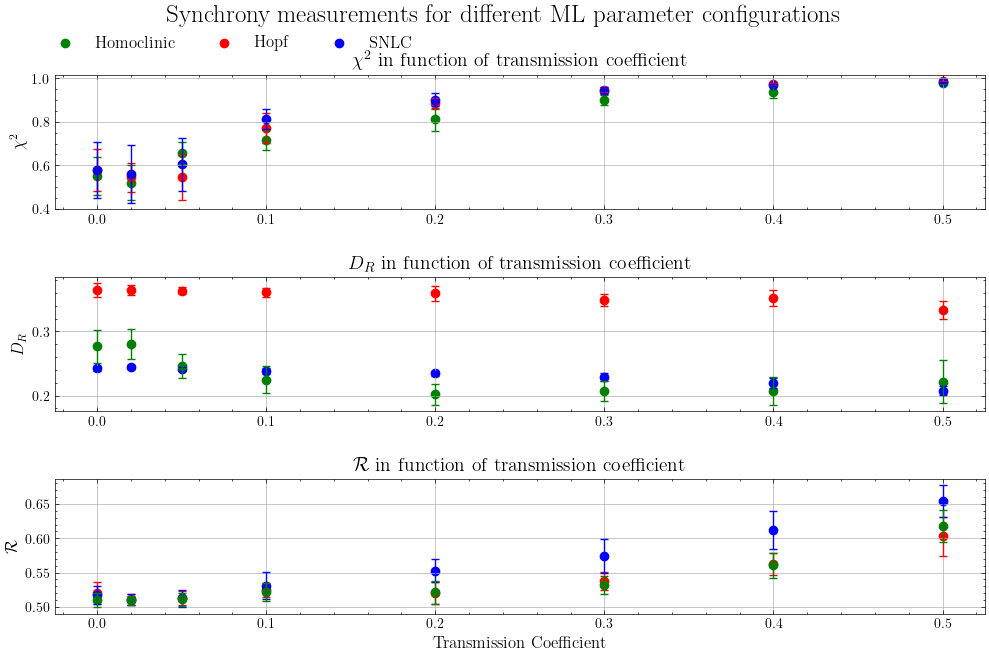

In [27]:
k = [0,0.02,0.05,0.1,0.2,0.3,0.4,0.5]
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

plt.suptitle('Synchrony measurements for different ML parameter configurations',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
#ax1.set_xlabel('Transmission Coefficient')
#ax2.set_xlabel('Transmission Coefficient')
ax3.set_xlabel('Transmission Coefficient')
ax1.set_ylabel(r'$\chi^2$')
ax2.set_ylabel(r'$D_R$')
ax3.set_ylabel(r'$\mathcal{R}$')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')
ax3.tick_params(axis = 'y')

ax1.title.set_text(r' $\chi^2$ in function of transmission coefficient')
ax2.title.set_text(r' $D_R$ in function of transmission coefficient')
ax3.title.set_text(r' $\mathcal{R}$ in function of transmission coefficient')

ln3 = ax1.scatter(k,chi_homoclinic_k[:,0],color = 'g', label = 'Homoclinic')
ax1.errorbar(k,chi_homoclinic_k[:,0],yerr=chi_homoclinic_k[:,1], fmt='none',capsize=3,color = 'g')
ln1 = ax1.scatter(k,chi_hopf_k[:,0],color = 'r', label = 'Hopf')
ax1.errorbar(k,chi_hopf_k[:,0],yerr=chi_hopf_k[:,1], fmt='none',capsize=3,color = 'r')
ln2 = ax1.scatter(k,chi_SNLC_k[:,0],color = 'b', label = 'SNLC')
ax1.errorbar(k,chi_SNLC_k[:,0],yerr=chi_SNLC_k[:,1], fmt='none',capsize=3,color = 'b')

ax2.scatter(k,rossum_hopf_k[:,0],color = 'r', label = 'Hopf')
ax2.errorbar(k,rossum_hopf_k[:,0],yerr=rossum_hopf_k[:,1], fmt='none',capsize=3,color = 'r')
ax2.scatter(k,rossum_SNLC_k[:,0],color = 'b', label = 'SNLC')
ax2.errorbar(k,rossum_SNLC_k[:,0],yerr=rossum_SNLC_k[:,1], fmt='none',capsize=3,color = 'b')
ax2.scatter(k,rossum_homoclinic_k[:,0],color = 'g', label = 'Homoclinic')
ax2.errorbar(k,rossum_homoclinic_k[:,0],yerr=rossum_homoclinic_k[:,1], fmt='none',capsize=3,color = 'g')

ax3.scatter(k,rel_hopf_k[:,0],color = 'r', label = 'Hopf')
ax3.errorbar(k,rel_hopf_k[:,0],yerr=rel_hopf_k[:,1], fmt='none',capsize=3,color = 'r')
ax3.scatter(k,rel_SNLC_k[:,0],color = 'b', label = 'SNLC')
ax3.errorbar(k,rel_SNLC_k[:,0],yerr=rel_SNLC_k[:,1], fmt='none',capsize=3,color = 'b')
ax3.scatter(k,rel_homoclinic_k[:,0],color = 'g', label = 'Homoclinic')
ax3.errorbar(k,rel_homoclinic_k[:,0],yerr=rel_homoclinic_k[:,1], fmt='none',capsize=3,color = 'g')


leg  = ax1.legend(bbox_to_anchor =( 0.4,1.4), ncols = 3 ,prop={'size':12})
#leg._legend_box.align = 'center'
plt.show()